In [1]:
import pandas as pd

In [21]:
import numpy as np

In [11]:
from datetime import date, timedelta

In [19]:
import seaborn as sns

In [2]:
df = pd.read_csv('invoices_exploration_data_set.csv')

In [3]:
df.head()

,INVOICE_ID,USER_TOKEN,BUSINESS_CATEGORY,INVOICE_AMOUNT_CENTS,CREATED_AT,SENT_AT,CANCELLED_AT,INVOICE_STATE,PAYER_CONTACT_TOKEN,CREATOR_EMPLOYEE_TOKEN,DELIVERY_METHOD,MERCHANT_INVOICE_NUMBER,AUTOMATIC_REMINDERS_ENABLED,BUYER_ENTERED_SHIPPING_ADDRESS_ENABLED,ACCEPTS_CREDIT_OR_DEBIT_CARD,ACCEPTS_BANK_TRANSFER
0,17022794,7GKHCN7QP5D8G,health_care_and_fitness,5342,2017-01-28 3:53:28,2017-01-28 3:53:28,NaN,PAID,X7Z9RP69413F55CKE9YTA8CT58,fFwHWd5duiWxfCOnXQGo,EMAIL,25,False,False,True,False
1,34647932,EG8FQS7KNVD3P,professional_services,13500,2017-11-19 1:12:44,2017-11-19 1:12:44,NaN,PAID,GBBVM4B46109X0ARGTD3X6W390,aO2jKsGfCbgsJtcygV7D,EMAIL,851,False,False,True,False
2,22039753,BPR4WEG6CKDA3,health_care_and_fitness,2731,2017-05-02 20:58:32,2017-05-02 20:58:32,NaN,UNPAID,Y7NHRCV1BD2EF2TRZ0A4QT5HVW,bbV7_DKYKxDe3_FYX_aH,EMAIL,52,False,False,True,False
3,25823986,94QD8N0C8XQKS,health_care_and_fitness,5530,2017-07-07 22:38:38,2017-07-07 23:19:47,NaN,PAID,4X05XCCEGX3J3FPNQARMZKQHT8,94QD8N0C8XQKS,EMAIL,136,False,False,True,False
4,23914162,8GV4XMBFTMTK9,health_care_and_fitness,2000,2017-06-05 0:53:22,2017-06-05 0:53:22,NaN,PAID,KH7ER8VVBS0675CT5TVB5QF3XC,8GV4XMBFTMTK9,EMAIL,12,False,False,True,False


In [4]:
df.describe()

,INVOICE_ID,INVOICE_AMOUNT_CENTS
count,9.949800e+04,9.949800e+04
mean,2.154460e+07,2.549260e+04
std,8.893294e+06,8.380104e+04
min,2.313690e+05,1.000000e+02
25%,1.434150e+07,3.622000e+03
50%,2.129237e+07,7.000000e+03
75%,2.896672e+07,1.750000e+04
max,3.747088e+07,5.000000e+06


In [ ]:
#number of active sellers has not been growing
#time series of revenue

In [72]:
df = df[df['INVOICE_STATE']=='PAID']

In [73]:
df['invoice_dollars'] = df['INVOICE_AMOUNT_CENTS']/100

In [74]:
df['date'] = pd.to_datetime(df['SENT_AT'])

In [75]:
df['date_day'] =  df['date'].dt.to_period('d')

In [76]:
df['month'] =  df['date'].dt.to_period('M')

In [77]:
df['date_day'] = df['date_day'].astype('str')

In [78]:
df['month'] = df['month'].astype('str')

In [79]:
df_agg =  df.groupby(['month']).sum('invoice_dollars').reset_index()

In [84]:
df_agg_avg =  df.groupby(['month']).mean('invoice_dollars').reset_index()

In [88]:
df_agg_ct =  df.groupby(['month']).count().reset_index()

In [86]:
df_agg_avg

,month,INVOICE_ID,INVOICE_AMOUNT_CENTS,AUTOMATIC_REMINDERS_ENABLED,BUYER_ENTERED_SHIPPING_ADDRESS_ENABLED,ACCEPTS_CREDIT_OR_DEBIT_CARD,ACCEPTS_BANK_TRANSFER,invoice_dollars
0,2016-01,5.958372e+06,28391.717203,0.0,0.000000,1.0,0.0,283.917172
1,2016-02,6.563442e+06,32115.519031,0.0,0.000000,1.0,0.0,321.155190
2,2016-03,7.240216e+06,30616.768922,0.0,0.000000,1.0,0.0,306.167689
3,2016-04,8.000027e+06,31496.143780,0.0,0.000000,1.0,0.0,314.961438
4,2016-05,8.825559e+06,27517.891949,0.0,0.000000,1.0,0.0,275.178919
5,2016-06,9.665194e+06,31951.699233,0.0,0.000000,1.0,0.0,319.516992
6,2016-07,1.049962e+07,30197.539515,0.0,0.000000,1.0,0.0,301.975395
7,2016-08,1.134034e+07,31398.670578,0.0,0.000000,1.0,0.0,313.986706
8,2016-09,1.228170e+07,27427.903114,0.0,0.000000,1.0,0.0,274.279031
9,2016-10,1.323346e+07,25472.555404,0.0,0.000000,1.0,0.0,254.725554


In [61]:
df_agg[['month']].min(), df_agg[['month']].max()

(month    2015-05
 dtype: object,
 month    2017-12
 dtype: object)

<AxesSubplot:>

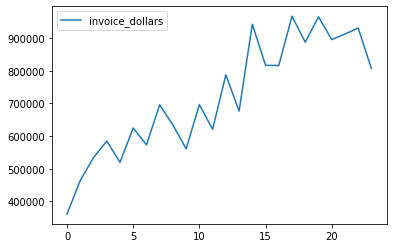

In [90]:
sns.lineplot(data=df_agg[['month','invoice_dollars']])

<AxesSubplot:>

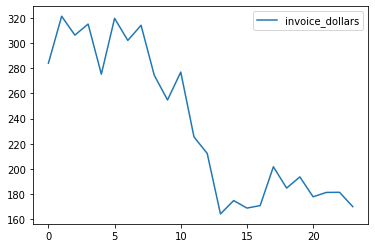

In [91]:
sns.lineplot(data=df_agg_avg[['month','invoice_dollars']])

<AxesSubplot:>

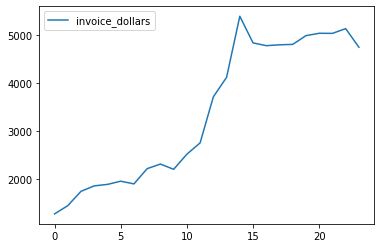

In [92]:
sns.lineplot(data=df_agg_ct[['month','invoice_dollars']])

In [94]:
df_2016= df_agg[df_agg["month"]<='2016-12'][df_agg["month"]>='2012-15-01']

<ipython-input-94-cc385c298115>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2016= df_agg[df_agg["month"]<='2016-12'][df_agg["month"]>='2012-15-01']


In [95]:
df_2016["month"].min(),df_2016["month"].max() 

('2016-01', '2016-12')

<AxesSubplot:>

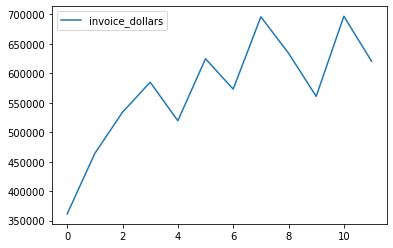

In [96]:
sns.lineplot(data=df_2016[['month','invoice_dollars']])

In [63]:
df_agg['invoice_dollars'].max()

961205.370000001

In [69]:
df_agg[df_agg['month']=='2017-12']['invoice_dollars']

30    775620.03
Name: invoice_dollars, dtype: float64

In [71]:
df_agg[df_agg['month']=='2017-12']['invoice_dollars']/df_agg['invoice_dollars'].max()

30    0.806924
Name: invoice_dollars, dtype: float64

In [82]:
df_agg[df_agg['month']=='2017-12']['invoice_dollars']/df_agg['invoice_dollars'].max()

23    0.834063
Name: invoice_dollars, dtype: float64

In [ ]:
df_agg["sent_vs_created"] = time_delta(df['SENT_AT'] - df['CREATED_AT'])

In [20]:
#DELIVERY_METHOD, BUSINESS_CATEGORY group by
#is there a lag in sent vs created
#why are there fewer invoices?

Help on function lineplot in module seaborn.relational:

lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can be help

In [109]:
import scipy as sp
import numpy as mp

In [156]:
df = pd.read_csv('user_invoice_summary_sample.csv', header=0)

In [118]:
df.head()

,USER_TOKEN,FIRST_SEND_APPLICATION,BUSINESS_CATEGORY,POSTAL_CODE,COUNTRY_CODE,FIRST_INVOICE_MONTH,COUNT_INVOICES_FIRST7D,COUNT_SENT_INVOICES_FIRST7D,COUNT_PAID_INVOICES_FIRST7D,TOTAL_INVOICE_AMOUNT_CENTS_FIRST7D,COUNT_PAYERS_FIRST7D,HAS_USED_AUTOMATIC_REMINDERS_FIRST7D,AVERAGE_INVOICE_AMOUNT_CENTS_FIRST7D,PCT_INVOICES_PAID_FIRST7D,COUNT_DELIVERY_METHODS_FIRST7D,HAS_ACCEPTED_CREDIT_OR_DEBIT_CARD_FIRST7D,CHURNED_IND
0,0EXR4701P1E6X,register,retail,21212,US,2018-01-01,1,1,1,14400,1,0,14400.000,1.000000,1,1,1
1,S5QV1PB8SYQ72,register,home_and_repair,44077-4621,US,2018-08-01,2,2,1,160200,2,0,80100.000,0.500000,2,1,1
2,9ZTQV2QBRHPGJ,dashboard,food_and_drink,19146,US,2018-04-01,3,3,2,483000,2,0,161000.000,0.666666,1,1,1
3,0Z20BGZZTD238,dashboard,charities_education_and_membership,21202,US,2016-11-01,41,41,32,325417120,41,0,7937002.927,0.780487,1,1,0
4,2H0WCPHJ2A0MK,dashboard,health_care_and_fitness,97321-2006,US,2017-03-01,19,18,18,28490035,18,0,1499475.526,1.000000,2,1,1


In [119]:
df.describe()

,COUNT_INVOICES_FIRST7D,COUNT_SENT_INVOICES_FIRST7D,COUNT_PAID_INVOICES_FIRST7D,TOTAL_INVOICE_AMOUNT_CENTS_FIRST7D,COUNT_PAYERS_FIRST7D,HAS_USED_AUTOMATIC_REMINDERS_FIRST7D,AVERAGE_INVOICE_AMOUNT_CENTS_FIRST7D,PCT_INVOICES_PAID_FIRST7D,COUNT_DELIVERY_METHODS_FIRST7D,HAS_ACCEPTED_CREDIT_OR_DEBIT_CARD_FIRST7D,CHURNED_IND
count,19223.000000,19223.000000,19223.000000,1.922300e+04,19223.000000,19223.000000,1.922300e+04,19223.000000,19223.000000,19223.0,19223.000000
mean,2.369661,2.261978,1.442699,2.523125e+08,1.741768,0.170213,2.870038e+07,0.568864,1.014722,1.0,0.744733
std,4.307123,4.208851,3.118149,6.897930e+09,3.648967,0.375829,5.503891e+08,0.447552,0.120441,0.0,0.436023
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.0,0.000000
25%,1.000000,1.000000,0.000000,1.650000e+04,1.000000,0.000000,1.300000e+04,0.000000,1.000000,1.0,0.000000
50%,1.000000,1.000000,1.000000,1.500000e+05,1.000000,0.000000,9.000000e+04,0.666666,1.000000,1.0,1.000000
75%,2.000000,2.000000,1.000000,1.409772e+06,2.000000,0.000000,7.372765e+05,1.000000,1.000000,1.0,1.000000
max,243.000000,243.000000,130.000000,4.234725e+11,242.000000,1.000000,4.234725e+10,1.000000,2.000000,1.0,1.000000


In [125]:
from scipy import stats

In [157]:
for col in ["COUNT_INVOICES_FIRST7D","COUNT_SENT_INVOICES_FIRST7D","COUNT_PAID_INVOICES_FIRST7D", "COUNT_PAYERS_FIRST7D"]:
    df[col] = stats.zscore(df[col])

In [158]:
for col in ["AVERAGE_INVOICE_AMOUNT_CENTS_FIRST7D","PCT_INVOICES_PAID_FIRST7D","TOTAL_INVOICE_AMOUNT_CENTS_FIRST7D"]:
    df[col] = pd.qcut(df[col], 10, duplicates='drop', labels=False)

In [159]:
#ohe FIRST_SEND_APPLICATION	BUSINESS_CATEGORY, COUNTRY_CODE
df_dummies = pd.get_dummies(df[['FIRST_SEND_APPLICATION','BUSINESS_CATEGORY','COUNTRY_CODE']])

In [160]:
df = df.join(df_dummies)

In [161]:
df = df.drop(columns=['BUSINESS_CATEGORY', 'FIRST_INVOICE_MONTH', 'FIRST_SEND_APPLICATION'])

In [162]:
df = df.drop(columns=['POSTAL_CODE'])

In [164]:
df = df.drop(columns=['COUNTRY_CODE'])

In [165]:
df

,USER_TOKEN,COUNT_INVOICES_FIRST7D,COUNT_SENT_INVOICES_FIRST7D,COUNT_PAID_INVOICES_FIRST7D,TOTAL_INVOICE_AMOUNT_CENTS_FIRST7D,COUNT_PAYERS_FIRST7D,HAS_USED_AUTOMATIC_REMINDERS_FIRST7D,AVERAGE_INVOICE_AMOUNT_CENTS_FIRST7D,PCT_INVOICES_PAID_FIRST7D,COUNT_DELIVERY_METHODS_FIRST7D,...,BUSINESS_CATEGORY_leisure_and_entertainment,BUSINESS_CATEGORY_professional_services,BUSINESS_CATEGORY_retail,BUSINESS_CATEGORY_transportation,COUNTRY_CODE_AU,COUNTRY_CODE_CA,COUNTRY_CODE_FR,COUNTRY_CODE_GB,COUNTRY_CODE_JP,COUNTRY_CODE_US
0,0EXR4701P1E6X,-0.318007,-0.299847,-0.141979,2,-0.203287,0,2,2,1,...,0,0,1,0,0,0,0,0,0,1
1,S5QV1PB8SYQ72,-0.085828,-0.062246,-0.141979,5,0.070770,0,4,0,2,...,0,0,0,0,0,0,0,0,0,1
2,9ZTQV2QBRHPGJ,0.146352,0.175355,0.178733,6,0.070770,0,5,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0Z20BGZZTD238,8.969177,9.204182,9.800077,9,10.759005,0,9,2,1,...,0,0,0,0,0,0,0,0,0,1
4,2H0WCPHJ2A0MK,3.861225,3.739366,5.310116,9,4.455687,0,8,2,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19218,0XSSP7RAQD4Q5,-0.318007,-0.299847,-0.462690,4,-0.477344,0,4,0,1,...,0,1,0,0,0,0,0,0,0,1
19219,7VC9C4QH1R52M,-0.318007,-0.299847,-0.141979,2,-0.203287,0,3,2,1,...,0,0,0,0,0,0,0,0,0,1
19220,50HGG2KN2ZSRN,-0.318007,-0.299847,-0.141979,5,-0.203287,0,6,2,1,...,0,0,0,0,0,0,0,0,0,1
19221,9RWE7JSSDF6MN,-0.318007,-0.299847,-0.462690,0,-0.203287,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
#COUNT_INVOICES_FIRST7D	COUNT_SENT_INVOICES_FIRST7D	COUNT_PAID_INVOICES_FIRST7D

In [174]:
df.count()

USER_TOKEN                                              19223
COUNT_INVOICES_FIRST7D                                  19223
COUNT_SENT_INVOICES_FIRST7D                             19223
COUNT_PAID_INVOICES_FIRST7D                             19223
TOTAL_INVOICE_AMOUNT_CENTS_FIRST7D                      19223
COUNT_PAYERS_FIRST7D                                    19223
HAS_USED_AUTOMATIC_REMINDERS_FIRST7D                    19223
AVERAGE_INVOICE_AMOUNT_CENTS_FIRST7D                    19223
PCT_INVOICES_PAID_FIRST7D                               19223
COUNT_DELIVERY_METHODS_FIRST7D                          19223
HAS_ACCEPTED_CREDIT_OR_DEBIT_CARD_FIRST7D               19223
CHURNED_IND                                             19223
FIRST_SEND_APPLICATION_dashboard                        19223
FIRST_SEND_APPLICATION_invoices                         19223
FIRST_SEND_APPLICATION_register                         19223
BUSINESS_CATEGORY_beauty_and_personal_care              19223
BUSINESS

In [104]:
#train, test split

df_train = df.sample(frac=0.50)
df_train_ids = df_train['USER_TOKEN']

df_test = df.merge(df_train_ids, on='USER_TOKEN', how='left')

In [102]:
df_test[df_test]

,USER_TOKEN,FIRST_SEND_APPLICATION,BUSINESS_CATEGORY,POSTAL_CODE,COUNTRY_CODE,FIRST_INVOICE_MONTH,COUNT_INVOICES_FIRST7D,COUNT_SENT_INVOICES_FIRST7D,COUNT_PAID_INVOICES_FIRST7D,TOTAL_INVOICE_AMOUNT_CENTS_FIRST7D,COUNT_PAYERS_FIRST7D,HAS_USED_AUTOMATIC_REMINDERS_FIRST7D,AVERAGE_INVOICE_AMOUNT_CENTS_FIRST7D,PCT_INVOICES_PAID_FIRST7D,COUNT_DELIVERY_METHODS_FIRST7D,HAS_ACCEPTED_CREDIT_OR_DEBIT_CARD_FIRST7D,CHURNED_IND
0,0EXR4701P1E6X,register,retail,21212,US,2018-01-01,1,1,1,14400,1,0,14400.000,1.000000,1,1,1
1,S5QV1PB8SYQ72,register,home_and_repair,44077-4621,US,2018-08-01,2,2,1,160200,2,0,80100.000,0.500000,2,1,1
2,9ZTQV2QBRHPGJ,dashboard,food_and_drink,19146,US,2018-04-01,3,3,2,483000,2,0,161000.000,0.666666,1,1,1
3,0Z20BGZZTD238,dashboard,charities_education_and_membership,21202,US,2016-11-01,41,41,32,325417120,41,0,7937002.927,0.780487,1,1,0
4,2H0WCPHJ2A0MK,dashboard,health_care_and_fitness,97321-2006,US,2017-03-01,19,18,18,28490035,18,0,1499475.526,1.000000,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19218,0XSSP7RAQD4Q5,register,professional_services,94546-1602,US,2017-05-01,1,1,0,80000,0,0,80000.000,0.000000,1,1,1
19219,7VC9C4QH1R52M,register,beauty_and_personal_care,62618,US,2018-08-01,1,1,1,22000,1,0,22000.000,1.000000,1,1,0
19220,50HGG2KN2ZSRN,register,health_care_and_fitness,97225,US,2017-12-01,1,1,1,259000,1,0,259000.000,1.000000,1,1,1
19221,9RWE7JSSDF6MN,dashboard,professional_services,97045,US,2017-03-01,1,1,0,100,1,0,100.000,0.000000,1,1,1


In [167]:
import statsmodels.api as sms

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
df_x = df.drop(columns=['CHURNED_IND'])

In [177]:
df_x = df.drop(columns=['USER_TOKEN'])

In [178]:
X, y = df_x, df['CHURNED_IND']

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=6516516)

In [183]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)

In [187]:
test_predict = clf.predict(X_test)

In [188]:
test_predict

array([1, 1, 1, ..., 1, 1, 1])

In [193]:
y_test['score'] = clf.predict(X_test)

In [196]:
y_test

4295                                                     1
8250                                                     1
3105                                                     1
12269                                                    0
4962                                                     0
                               ...                        
6712                                                     1
11850                                                    1
12396                                                    1
4411                                                     1
score    [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, ...
Name: CHURNED_IND, Length: 6345, dtype: object

In [197]:
clf.score(X=y_test['score'], y=y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
true-positive    
false-positive
true-negative
false-negative

In [ ]:
#log loss = cost function

In [ ]:
AUC 

receiver-operater curve



tpr



-----------------
fpr